In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#數據、矩陣處理套件numpy
import numpy as np
#繪圖處理套件matplotlib
import matplotlib.pyplot as plt
#繪圖處理套件顯示中文matplotlib.font_manage
#產生亂數的套件
import random
#控制輸出的套件(動畫使用)
from IPython import display

In [3]:
import matplotlib.font_manager as plt_font
import matplotlib.colors as mcolors
font=plt_font.FontProperties(fname="/content/drive/MyDrive/kaiu.ttf")
folder = "/content/drive/MyDrive/指數衰減/指數圖形/"
s_list=[12,10,9,8,7.5,7,6.5,6,5.5,4.5]

In [4]:
All_Log = []
for i in range(10):
  dir = f"/content/drive/MyDrive/指數衰減/指數{s_list[i]}/Log-5000.npy"
  Log_item = np.load(dir, allow_pickle=True).item()
  All_Log.append(Log_item)

## 顏色
要說明去看線性檔案

In [5]:
cdict = mcolors.CSS4_COLORS
# print(cdict)

# 這版顏色很舒服，但看起來很不專業(?
# color_list  = [
#     cdict["tomato"], cdict["orange"], cdict["gold"],
#     cdict["springgreen"], cdict["deepskyblue"], cdict["cornflowerblue"],
#     cdict["mediumpurple"], cdict["orchid"], cdict["pink"], cdict["lavender"]
#   ]

# 這版顏色眼睛會痛，但感覺比較專業(?
color_list  = [
    cdict["red"], cdict["darkorange"], cdict["gold"],
    cdict["lime"], cdict["aqua"], cdict["dodgerblue"],
    cdict["blue"], cdict["blueviolet"], cdict["magenta"], cdict["deeppink"]
  ]

## 畫所有訓練獎勵統計

In [6]:
# Load_File=5000
# Log= np.load(f"Log-{Load_File}.npy", allow_pickle=True).item()
# #Log={"TrainReward":[],"TestReward":[],"Loss":[]}

In [7]:
for i in range(10):
  Log = All_Log[i]
  pic = "訓練資料獎勵"
  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"指數{s_list[i]}的{pic}",fontproperties=font,fontsize=20)
  # plt.suptitle(f"斜率 = 0.9/{500*i} = {0.9/(500*i)}",fontproperties=font,fontsize=5)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Train Reward",fontsize=15)
  plt.plot(Log["TrainReward"],"b.")
  plt.savefig(folder+f"{pic}/指數{s_list[i]}_{pic}.png")
  plt.close()

### 統整

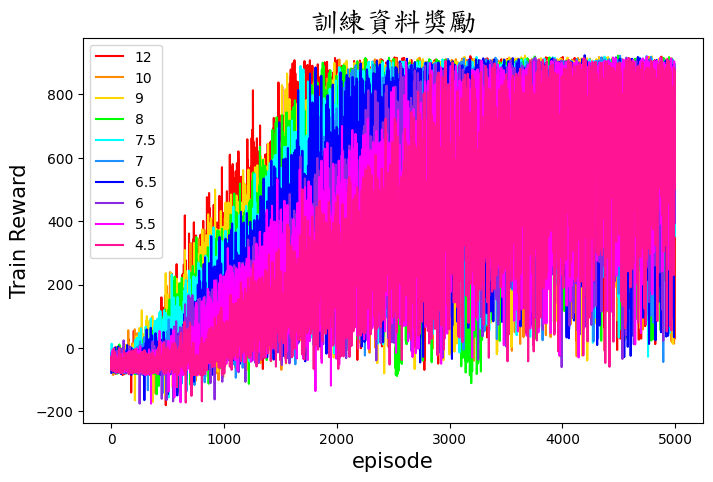

In [8]:
pic = "訓練資料獎勵"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for i in range(1,11):
  Log = All_Log[i-1]
  plt.plot(Log["TrainReward"],f"{color_list[i-1]}",label=s_list[i-1])
plt.legend()
plt.savefig(folder+f"指數訓練資料獎勵統計.png")

## 畫訓練平均獎勵統計
每50次取一次平均

In [9]:
# avg=np.ones(len(Log["TrainReward"]))
# for i in range(len(Log["TrainReward"])//50):
#   avg[i*50:i*50+50]=np.mean(Log["TrainReward"][i*50:i*50+50])

In [10]:
all_avg = []
for j in range(10):
  Log = All_Log[j]
  pic = "訓練資料獎勵平均"

  avg=np.ones(len(Log["TrainReward"]))
  for i in range(len(Log["TrainReward"])//50):
    avg[i*50:i*50+50]=np.mean(Log["TrainReward"][i*50:i*50+50])
  all_avg.append(avg)

  plt.figure(figsize=(8,5))
  plt.title(f"指數{s_list[j]}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Train Reward",fontsize=15)
  plt.plot(avg,"b.-")
  plt.savefig(folder+f"{pic}/指數{s_list[j]}_{pic}.png")
  plt.close()

### 統整

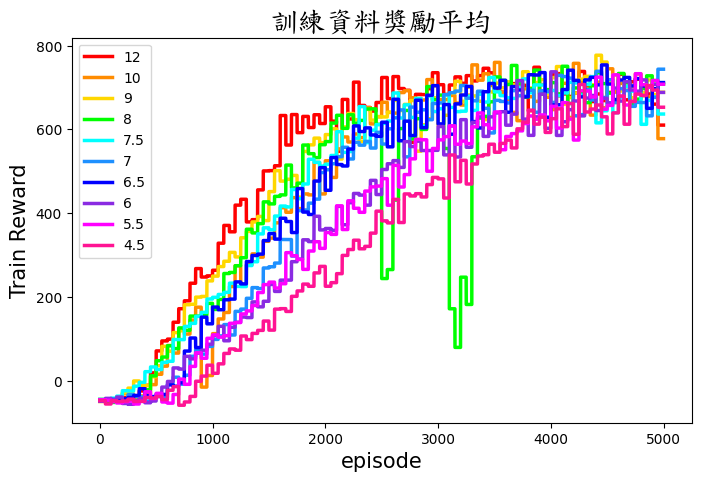

In [12]:
pic = "訓練資料獎勵平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for i in range(1,11):
  plt.plot(all_avg[i-1],f"{color_list[i-1]}",label=s_list[i-1],linewidth=2.5)
plt.legend()
plt.savefig(folder+f"指數訓練資料獎勵平均統計.png")

## 畫訓練資料的損失值

In [14]:
for i in range(10):
  Log = All_Log[i]
  pic = "訓練資料損失值"

  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"指數{s_list[i]}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Loss",fontsize=15)
  plt.plot(Log["Loss"],"b.-")
  plt.savefig(folder+f"{pic}/指數{s_list[i]}_{pic}.png")
  plt.close()

<ipython-input-22-e48fae9986db>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(folder+f"{pic}.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


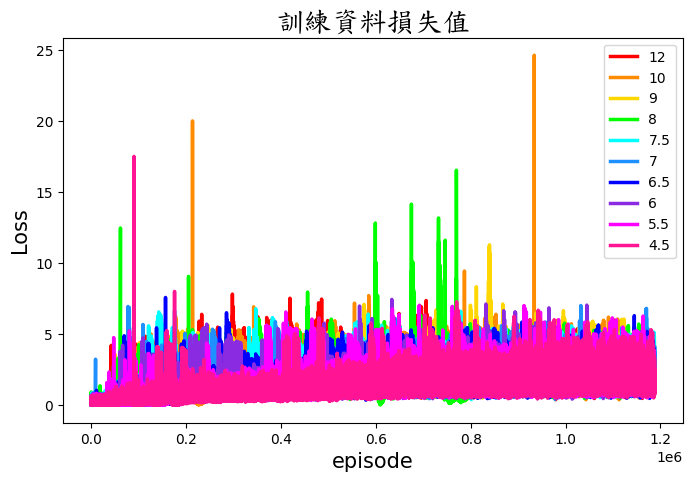

In [22]:
pic = "訓練資料損失值"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Loss",fontsize=15)
for i in range(1,11):
  plt.plot(All_Log[i-1]["Loss"],f"{color_list[i-1]}",label=s_list[i-1],linewidth=2.5)
plt.legend()
plt.savefig(folder+f"{pic}.png")

In [23]:
all_loss_avg = []
for i in range(1,11):
  Log = All_Log[i-1]
  avg=np.ones(len(Log["Loss"]))
  for i in range(len(Log["Loss"])//10000):
    t = i*10000
    avg[t:t+10000]=np.mean(Log["Loss"][t:t+10000])
  all_loss_avg.append(avg)

<ipython-input-24-ed86df2170e3>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(folder+f"{pic}.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


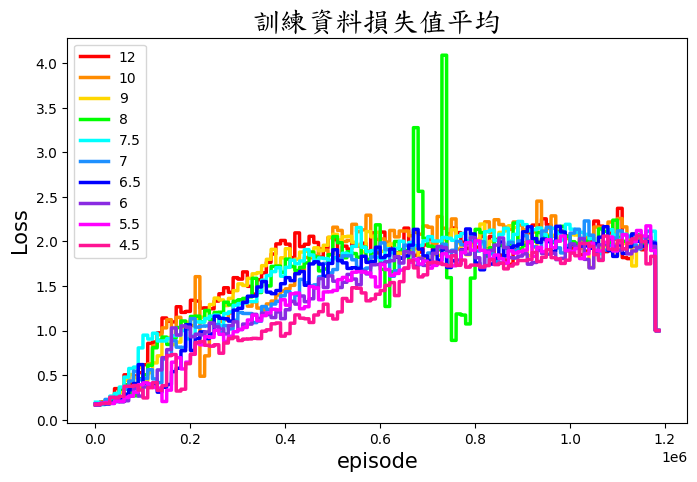

In [24]:
pic = "訓練資料損失值平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Loss",fontsize=15)
for i in range(1,11):
  plt.plot(all_loss_avg[i-1],f"{color_list[i-1]}",label=s_list[i-1],linewidth=2.5)
plt.legend()
plt.savefig(folder+f"{pic}.png")

## 畫測試資料的獎勵統計

In [15]:
for i in range(10):
  Log = All_Log[i]
  pic = "測試資料獎勵"

  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"指數{s_list[i]}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Test Reward",fontsize=15)
  plt.plot(Log["TestReward"],"r.-")
  plt.savefig(folder+f"{pic}/指數{s_list[i]}_{pic}.png")
  plt.close()

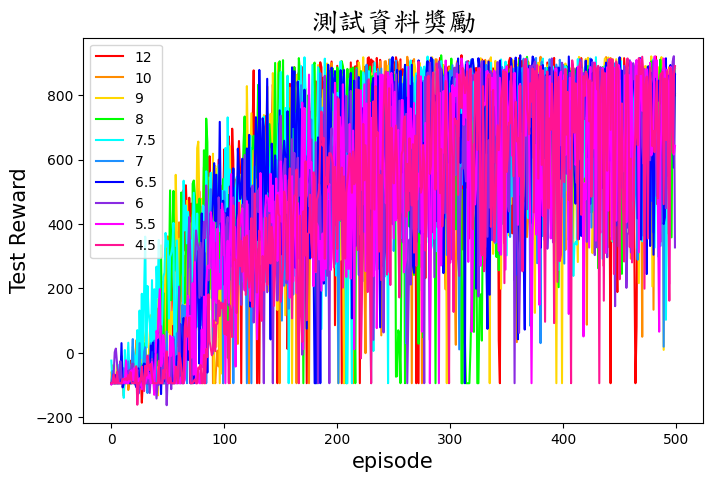

In [26]:
pic = "測試資料獎勵"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Test Reward",fontsize=15)
for i in range(1,11):
  Log = All_Log[i-1]
  plt.plot(Log["TestReward"],f"{color_list[i-1]}",label=s_list[i-1])
plt.legend()
plt.savefig(folder+f"指數測試資料獎勵統計.png")

## 畫測試獎勵平均

In [28]:
Test_all_avg = []
for j in range(1,11):
  Log = All_Log[j-1]
  pic = "測試資料獎勵平均"

  Test_avg=np.ones(len(Log["TestReward"]))
  for i in range(len(Log["TestReward"])//10):
    Test_avg[i*10:i**10+10]=np.mean(Log["TestReward"][i*10:i*10+10])
  Test_all_avg.append(Test_avg)

  plt.figure(figsize=(8,5))
  plt.title(f"指數{s_list[j-1]}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Test Reward",fontsize=15)
  plt.plot(Test_avg,"r.-")
  plt.savefig(folder+f"{pic}/指數{s_list[j-1]}_{pic}.png")
  plt.close()

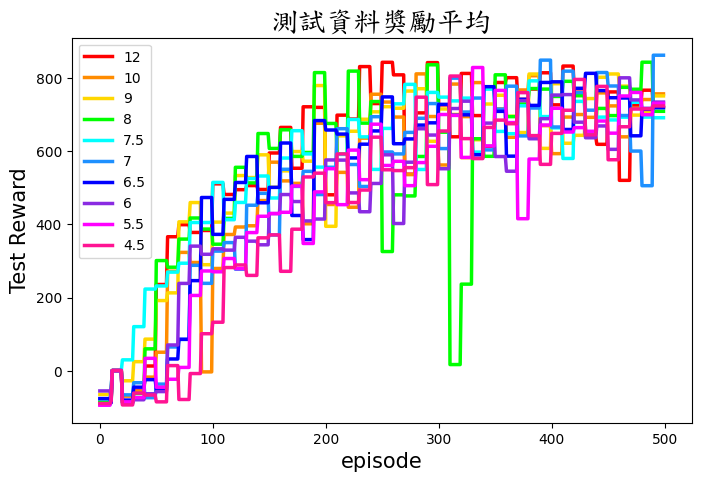

In [29]:
pic = "測試資料獎勵平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Test Reward",fontsize=15)
for i in range(1,11):
  plt.plot(Test_all_avg[i-1],f"{color_list[i-1]}",label=s_list[i-1],linewidth=2.5)
plt.legend()
plt.savefig(folder+f"指數測試資料獎勵平均統計.png")

## 畫測試獎勵的最大值、最小值、平均值、標準差
私器公用(?

In [35]:
max, min, mean, std = [], [], [], []
for i in range(10):
  max.append(np.max(All_Log[i]["TestReward"]))
  min.append(np.min(All_Log[i]["TestReward"]))
  mean.append(np.mean(All_Log[i]["TestReward"]))
  std.append(np.std(All_Log[i]["TestReward"]))

In [37]:
x = ["max_reward", "min_reward", "mean_reward", "std_reward"]
l = []
print(f"第 i 項：[{x[0]}, {x[1]}, {x[2]}, {x[3]}]")
for i in range(10):
  l.append([max[i], min[i], mean[i], std[i]])
  print(f"第 {s_list[i]} 項：{l[i]}")

第 i 項：[max_reward, min_reward, mean_reward, std_reward]
第 12 項：[924.4163090128707, -155.5518248175187, 576.9355686419225, 320.1876780798673]
第 10 項：[919.5367346938659, -134.54084507042325, 514.1943208232175, 327.4329981033749]
第 9 項：[920.7634920634847, -133.39378881987645, 557.5487628052307, 312.15663478564124]
第 8 項：[924.2028340080848, -94.99999999999905, 535.260057631242, 326.0455352474594]
第 7.5 項：[920.3568627450849, -140.54768683274045, 551.3424629594828, 284.738916126409]
第 7 項：[915.9470588235156, -125.50794223826742, 505.37875863084196, 324.1881873663543]
第 6.5 項：[924.169547325097, -128.80291970802926, 527.1908415061789, 331.2991152123174]
第 6 項：[921.3371647509541, -163.43024911032086, 469.05904937806065, 310.4743850545941]
第 5.5 項：[920.6318725099554, -131.19438943894394, 461.7797089241665, 319.98691863950626]
第 4.5 項：[919.7280701754266, -161.97153024911094, 443.1301040008558, 334.3795702232582]


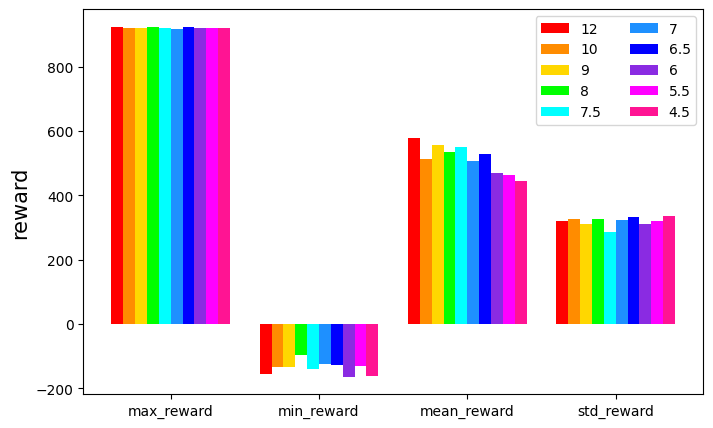

In [21]:
x_pos=np.arange(len(x))
bar_width=0.08
plt.figure(figsize=(8,5))
plt.ylabel("reward",fontsize=15)
for i in range(len(s_list)):
  offset=i*bar_width
  h=l[i]
  plt.bar(x_pos+offset,h,label=f"{s_list[i]}",width=bar_width,color=color_list[i])
plt.xticks(x_pos+bar_width*(len(s_list)-1)/2,x)
plt.legend(loc="upper right",ncols=2)
plt.savefig(folder+"所有圖形測試獎勵最大值、最小值、平均值、標準差.png")
plt.show()

## 畫訓練獎勵的最大值、最小值、平均值、標準差

In [33]:
max, min, mean, std = [], [], [], []
for i in range(10):
  max.append(np.max(All_Log[i]["TrainReward"]))
  min.append(np.min(All_Log[i]["TrainReward"]))
  mean.append(np.mean(All_Log[i]["TrainReward"]))
  std.append(np.std(All_Log[i]["TrainReward"]))

In [34]:
x = ["max_reward", "min_reward", "mean_reward", "std_reward"]
l = []
print(f"第 i 項：[{x[0]}, {x[1]}, {x[2]}, {x[3]}]")
for i in range(10):
  l.append([max[i], min[i], mean[i], std[i]])
  print(f"第 {s_list[i]} 項：{l[i]}")

第 i 項：[max_reward, min_reward, mean_reward, std_reward]
第 12 項：[920.7032786885112, -180.36271777003464, 526.0529367751877, 298.0688543583888]
第 10 項：[918.3354838709572, -143.58405797101477, 470.4119100083489, 313.40458816257063]
第 9 項：[922.166666666655, -169.8816901408454, 499.27807414634077, 299.59191535856394]
第 8 項：[922.263492063485, -145.72876712328804, 457.42327141570496, 307.77108765720374]
第 7.5 項：[921.1634920634848, -155.8100671140944, 473.1376874387694, 297.06944496766357]
第 7 項：[921.7012448132722, -141.33453237410117, 440.6095154677175, 314.6822899225763]
第 6.5 項：[923.5032786885118, -164.34925373134382, 459.1943315050956, 310.87229476661224]
第 6 項：[916.1178988326772, -175.36291793313075, 396.4273492849088, 299.1414791239644]
第 5.5 項：[919.5480620154998, -175.3857142857144, 387.2001798770979, 297.59799430503944]
第 4.5 項：[913.8948616600728, -172.17643312101936, 336.1054875362565, 293.49605480306906]


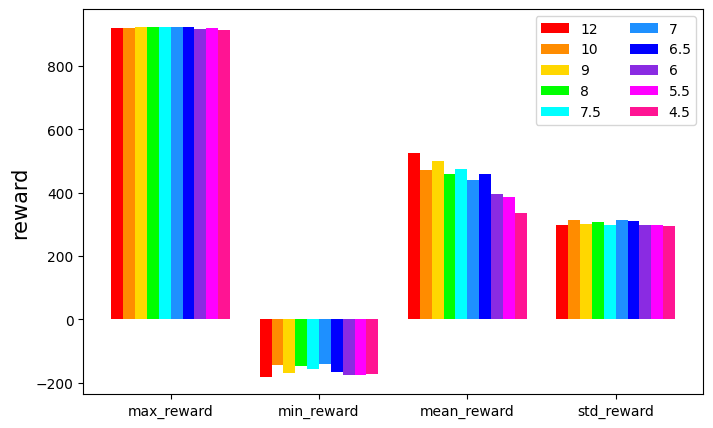

In [32]:
x_pos=np.arange(len(x))
bar_width=0.08
plt.figure(figsize=(8,5))
plt.ylabel("reward",fontsize=15)
for i in range(len(s_list)):
  offset=i*bar_width
  h=l[i]
  plt.bar(x_pos+offset,h,label=f"{s_list[i]}",width=bar_width,color=color_list[i])
plt.xticks(x_pos+bar_width*(len(s_list)-1)/2,x)
plt.legend(loc="upper right",ncols=2)
plt.savefig(folder+"所有圖形訓練獎勵最大值、最小值、平均值、標準差.png")
plt.show()

## 暫時移走......
公器私用好好笑www

In [ ]:
folder = "/content/drive/MyDrive/指數衰減/公器私用/"
s_list=[12,9,7,6,5.5]
color=["r","g","b","c","m"]

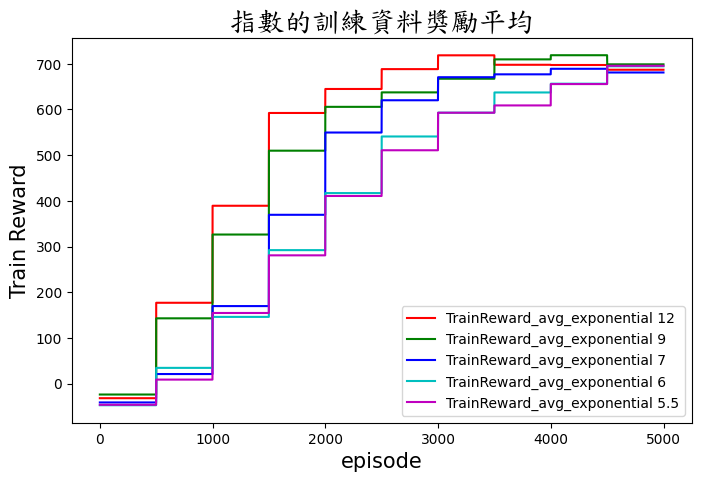

In [ ]:
pic = "訓練資料獎勵平均"
plt.figure(figsize=(8,5))
plt.title(f"指數的{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for j in range(5):
  Log = All_Log[j]
  avg=np.ones(len(Log["TrainReward"]))
  for i in range(len(Log["TrainReward"])//500):
    avg[i*500:i*500+500]=np.mean(Log["TrainReward"][i*500:i*500+500])

  plt.plot(avg,f"{color[j]}-",label=f"TrainReward_avg_exponential {s_list[j]}")
plt.legend()
plt.savefig(folder+f"{pic}/指數_每500回合_{pic}.png")

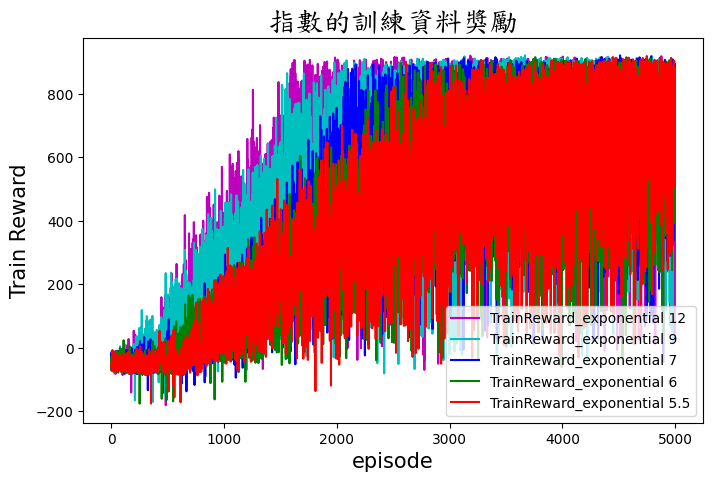

In [ ]:
pic = "訓練資料獎勵"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"指數的{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for i in range(5):
  Log = All_Log[i]
  plt.plot(Log["TrainReward"],f"{color[4-i]}-",label=f"TrainReward_exponential {s_list[i]}")
plt.legend()
plt.savefig(folder+f"{pic}/指數_{pic}.png")

#### 確認 484 出包的程式

In [ ]:
print(len(All_Log[0]["TrainReward"]))

5000


In [ ]:
td = f"/content/drive/MyDrive/指數衰減/指數7.5/Log-10.npy"
tli = np.load(dir, allow_pickle=True).item()
print(len(tli["TestReward"]))
print(tli["TestReward"])

1000
[-61.834246575342604, -94.999999999999, -70.77854671280308, -94.999999999999, -94.99999999999892, -35.14084507042324, -73.57142857142875, -69.1935483870972, -35.559440559441256, -10.254237288136029, -53.18815331010525, -60.11627906976806, -95.3857142857144, -42.64347826086902, -94.99999999999909, -94.999999999999, -88.99253731343325, -77.6714285714292, -76.44006514658007, -22.27272727272803, -86.13703703703767, -58.9344262295089, -39.55161290322539, -71.90996884735236, -27.692307692308407, -36.747572815534696, 2.791902834009562, -62.741935483871686, 68.04347826087098, 43.888888888889454, 36.03448275861948, -62.050915750915614, -94.99999999999903, -20.42372881356008, 56.006711409398555, 116.46953405017935, 5.129824561406394, 174.23076923077352, -42.7944055944052, 84.31034482759027, 138.12883435583217, -133.39378881987645, 3.9761092150160886, 229.90974729242257, 46.732283464570415, -31.026936026936706, -1.8100358422949154, 33.65497076023325, 324.2439862542897, 256.72413793103806, 63